In [2]:
!pip install yfinance

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [0]:
%config InlineBackend.figure_format = 'retina'

In [0]:
start_date = '2016-02-01'
end_date = '2019-12-31'

In [6]:
data = yfinance.download("AUDUSD=X CADUSD=X CHFUSD=X \
                          CNYUSD=X DKKUSD=X EURUSD=X \
                          GBPUSD=X HKDUSD=X JPYUSD=X \
                          KZTUSD=X NOKUSD=X NZDUSD=X \
                          PLNUSD=X RUBUSD=X SEKUSD=X",
                        start=start_date, end=end_date)

[*********************100%***********************]  15 of 15 completed


In [7]:
data['Close'].head()

AUDUSD=X  CADUSD=X  CHFUSD=X  ...  PLNUSD=X  RUBUSD=X  SEKUSD=X
Date                                      ...                              
2016-02-01  0.706864  0.715676  0.976086  ...  0.245228  0.013256  0.116426
2016-02-02  0.711086  0.716846  0.980873  ...  0.247986  0.012943  0.117306
2016-02-03  0.702988  0.711238  0.981653  ...  0.248004  0.012545  0.116964
2016-02-04  0.715461  0.724942  0.994827  ...  0.251062  0.012999  0.118491
2016-02-05  0.719942  0.726998  1.006654  ...  0.253291  0.013026  0.119067

[5 rows x 15 columns]

In [0]:
new_data = data['Close'].interpolate(method='polynomial', order=3)

In [9]:
new_data.columns

Index(['AUDUSD=X', 'CADUSD=X', 'CHFUSD=X', 'CNYUSD=X', 'DKKUSD=X', 'EURUSD=X',
       'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'KZTUSD=X', 'NOKUSD=X', 'NZDUSD=X',
       'PLNUSD=X', 'RUBUSD=X', 'SEKUSD=X'],
      dtype='object')

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(new_data.values)

In [79]:
X = scaled[:-1]
X.shape

(1018, 15)

In [80]:
y = scaled[1:]
y.shape

(1018, 15)

In [81]:
X.shape

(1018, 15)

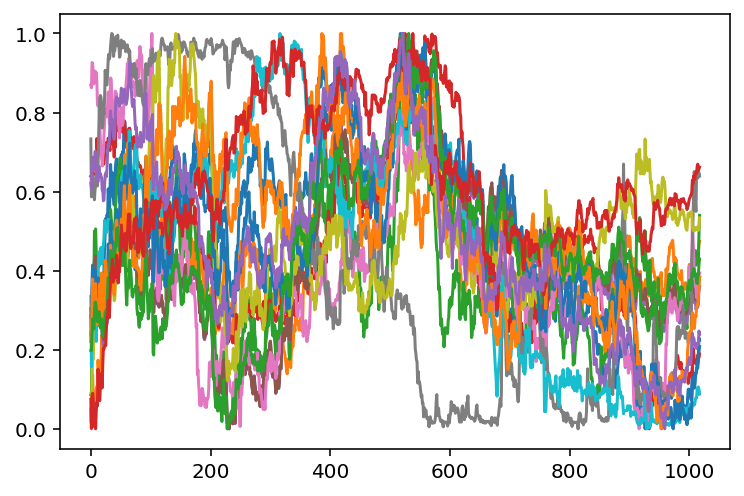

In [82]:
plt.plot(y)
plt.show()

In [0]:
X_train, X_test = X[:500], X[500:]
y_train, y_test = y[:500], y[500:]

In [84]:
y_train.shape

(500, 15)

In [85]:
y_test.shape

(518, 15)

In [0]:
plt.plot(y_test)

In [0]:
plt.plot(y_train)

In [0]:
plt.plot(y)

In [0]:
plt.plot(X_train)
plt.show()

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.tsa.VARMAX(y_train, order=(1, 0), exog=X_train)

In [92]:
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [63]:
len(y_test)

509

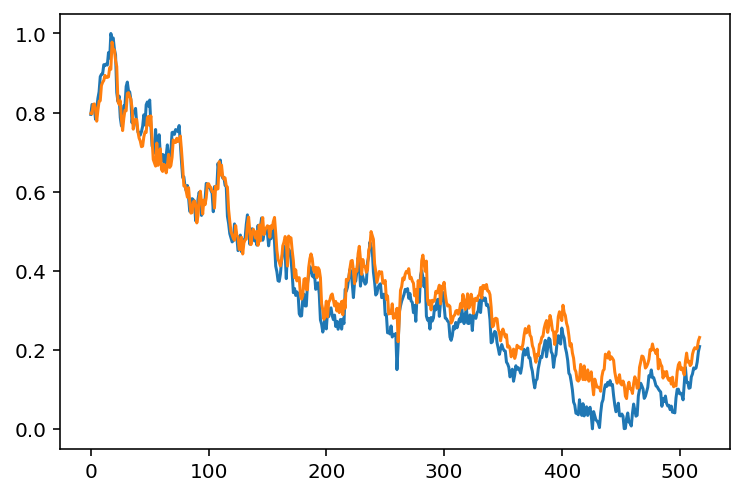

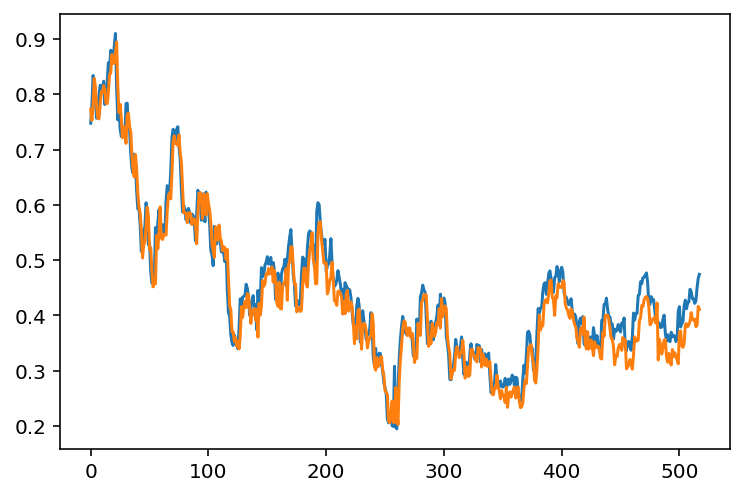

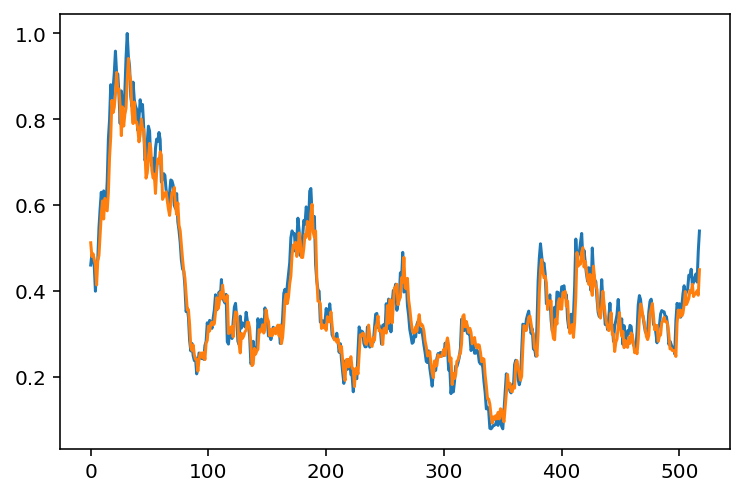

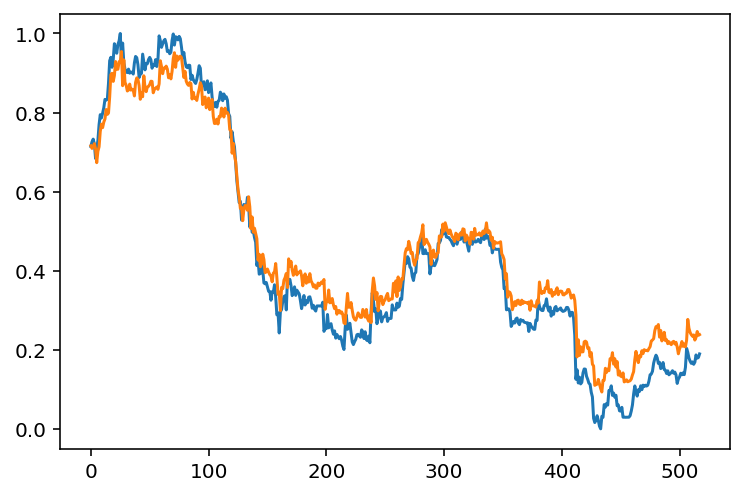

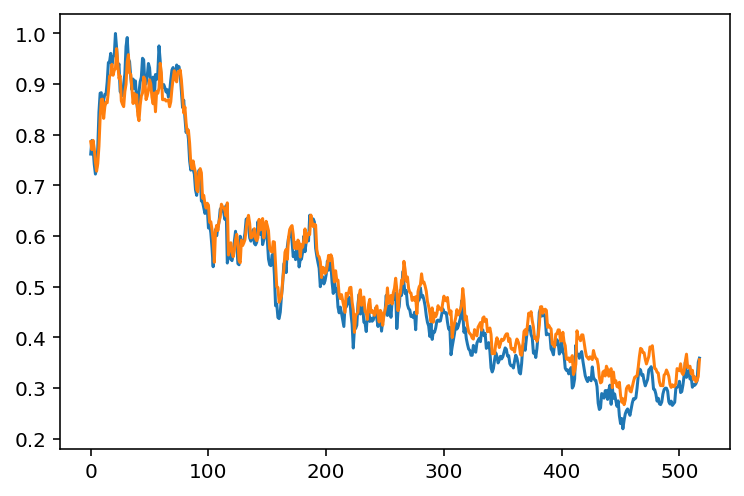

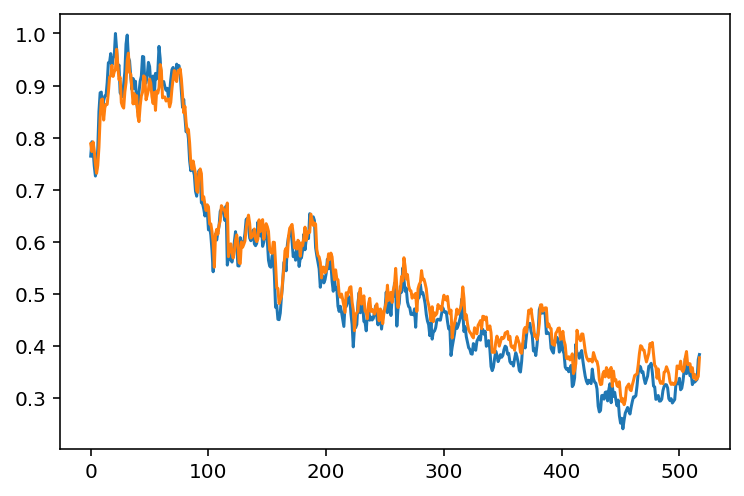

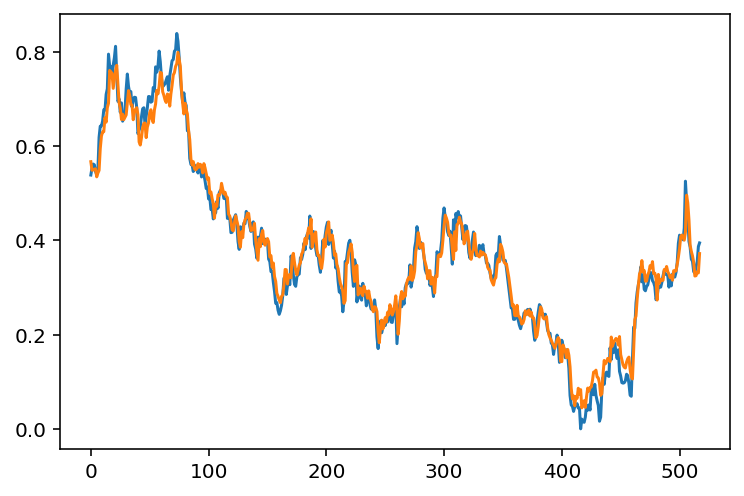

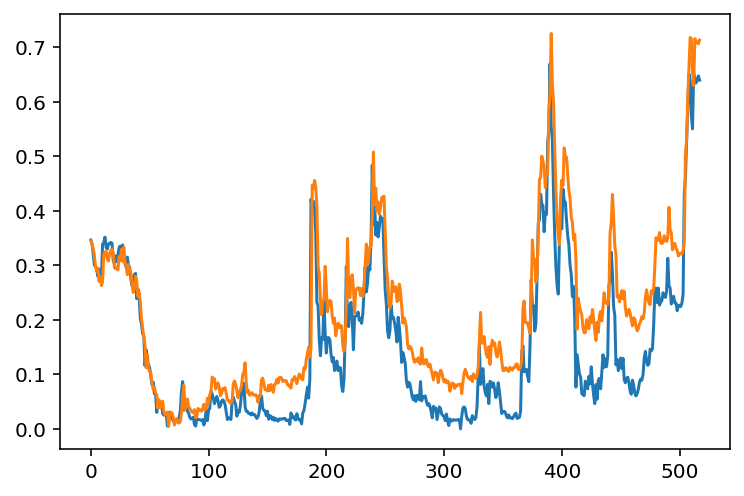

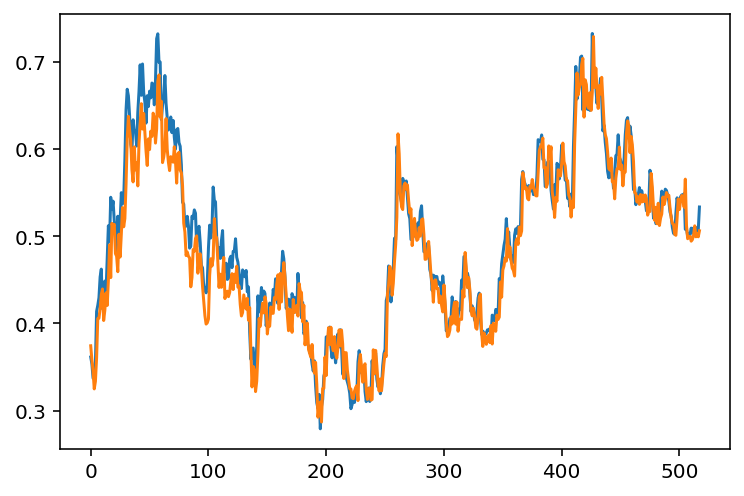

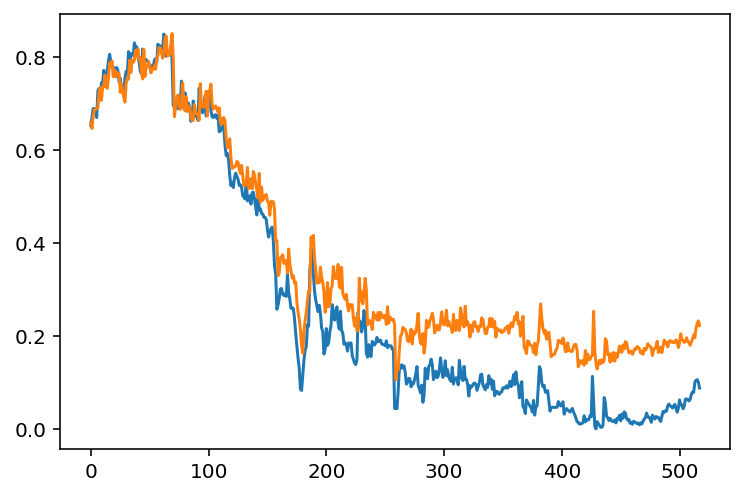

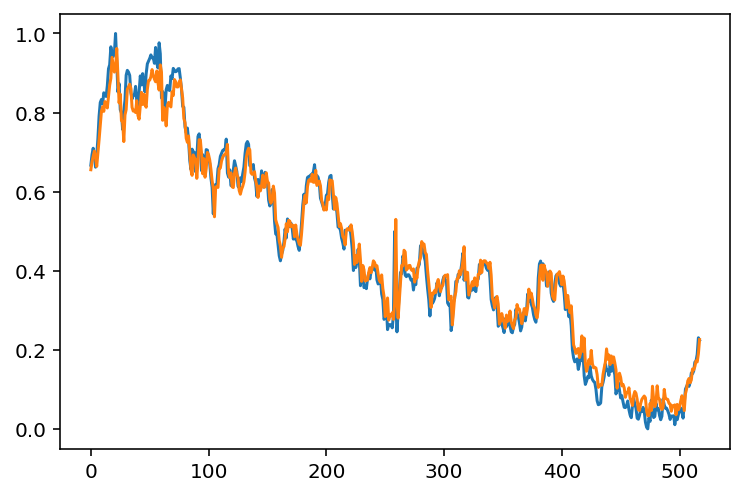

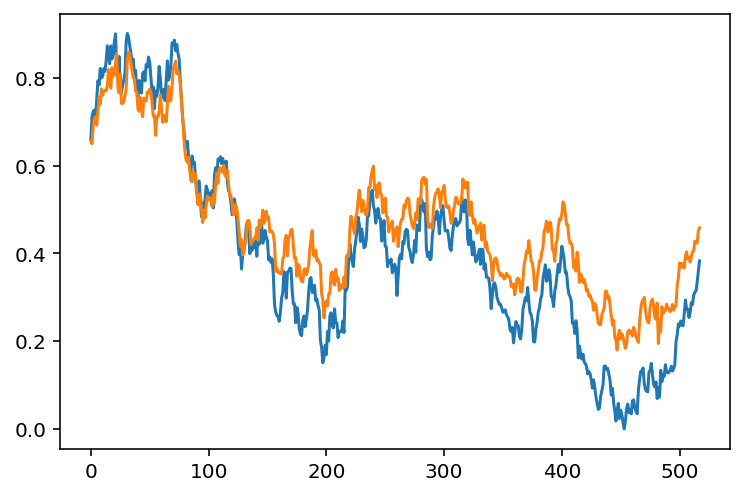

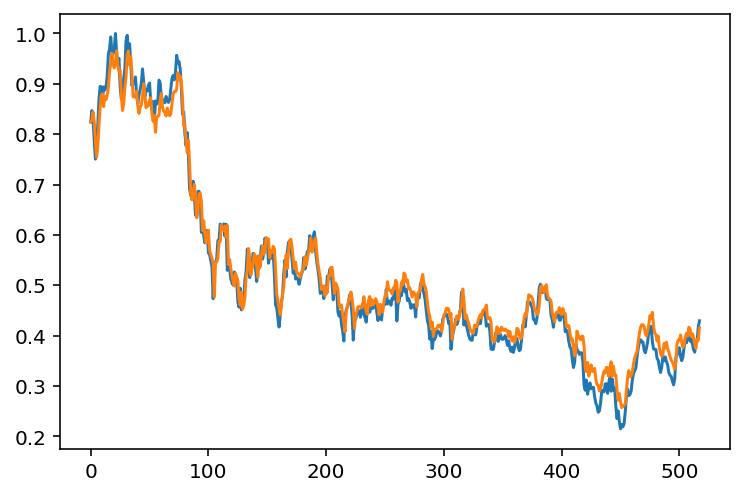

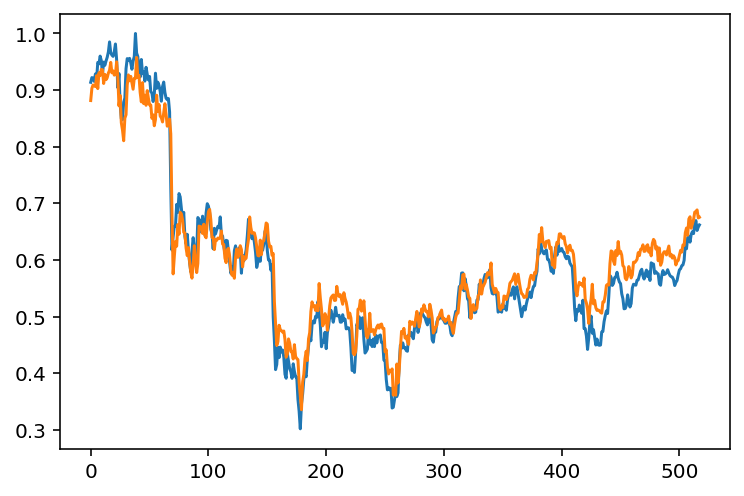

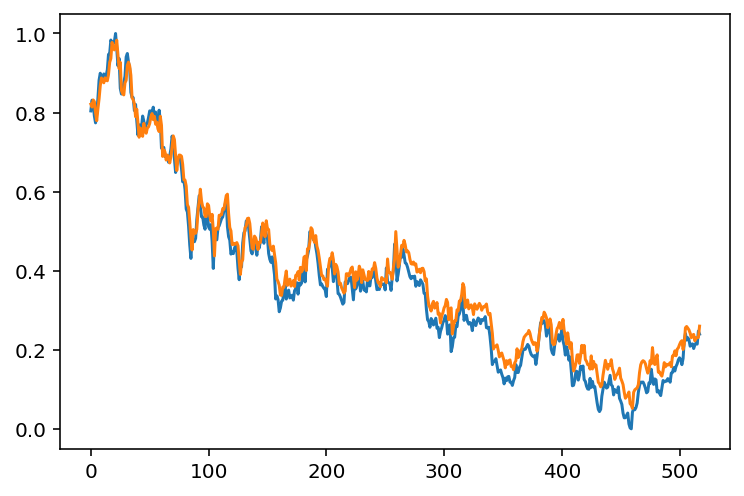

In [93]:
for i in range(15):
  plt.plot(y_test[:, i])
  plt.plot(results.predict(0, 500 + len(y_test) - 1, exog=X_test)[500:, i])
  plt.show()